# Decorators

To understand decorators, we need to understand passing functions as variables, scopes & closures.
A decorator enables to modify the behavior of a function, of its args, and also its ouputs, without modifying its structure.

A decorator is a design pattern in Python that allows a user to add new functionality to an existing object without modifying its structure. Decorators are usually called before the definition of a function you want to decorate.

Example : you have a function that plot charts. And you want to use that function 3 times to plot 3 charts. Well you can create your charting function, and create a decorator function that you will use to decorate your chart function with, to generate it 3 times whenever you want it to, without impacting your freedom of customization inside the chart function.

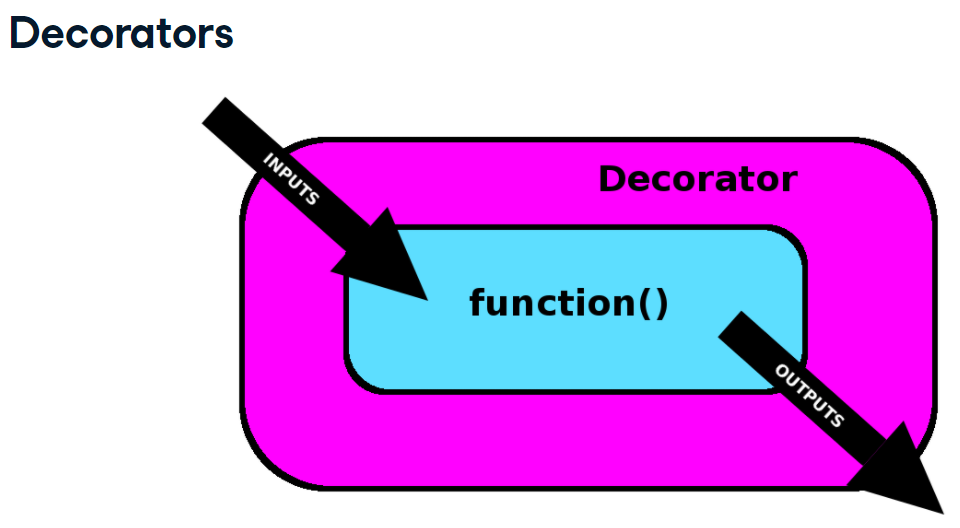

In [17]:
from IPython.display import Image
Image("C:/Users/T0230575/Desktop/Datalab LAS/Documentation/Method/deco1.png")

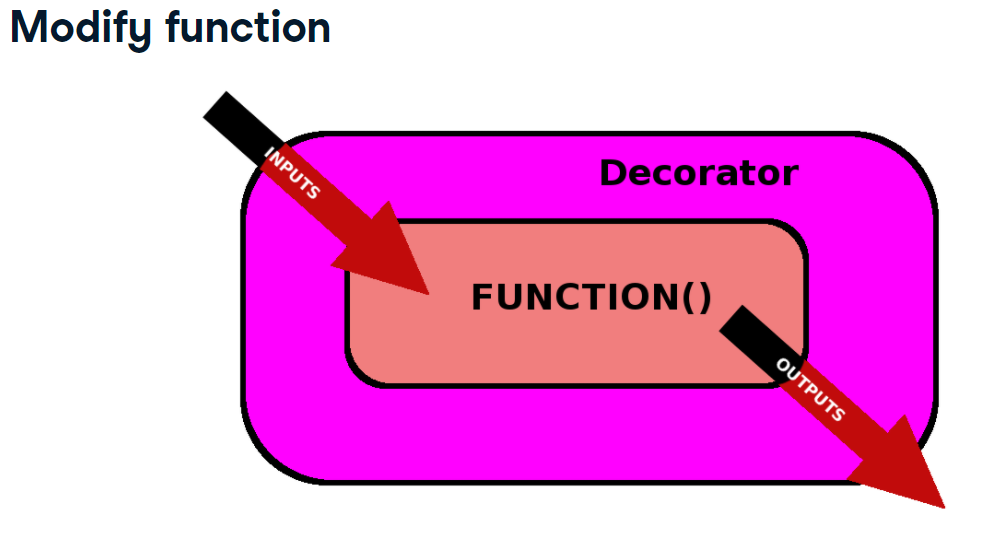

In [18]:
from IPython.display import Image
Image("C:/Users/T0230575/Desktop/Datalab LAS/Documentation/Method/deco2.png")

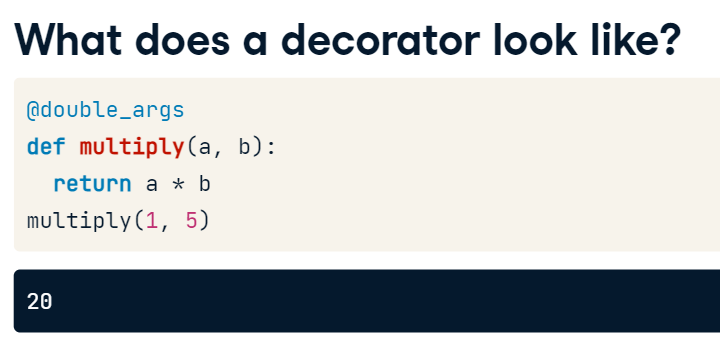

In [19]:
from IPython.display import Image
Image("C:/Users/T0230575/Desktop/Datalab LAS/Documentation/Method/deco3.png")

### Case 1
In this case, we want to multiply function args by 2. We don't use decorators.

In [20]:
def multiply(a, b):
    return a * b

def double_args(func):
    return func

new_multiply = double_args(multiply)

print("This is the result of the multiply function : ", multiply(2, 5))
print("This is the result of the double_args(multiply) function : ", new_multiply(2, 5))
print("We should expect 10. We have it")

This is the result of the multiply function :  10
This is the result of the double_args(multiply) function :  10
We should expect 10. We have it


### Case 2


In [21]:
def multiply(a, b):
    return a * b

def double_args(func):
    """
    Define a new function that we can modify
    """
    def wrapper(a, b):
        """
        For now, just return the un-modified function
        """
        return func(a, b)
    """
    Then return the new function
    """
    return wrapper


new_multiply = double_args(multiply)

print("This is the result of multiply(2, 5) : ", multiply(2, 5))
print("This is the result of the double_args(multiply) function, using a wrapper : ", new_multiply(2, 5))
print("We should expect 10, we have it.")

This is the result of multiply(2, 5) :  10
This is the result of the double_args(multiply) function, using a wrapper :  10
We should expect 10, we have it.


### Case 3 


In [22]:
def multiply(a, b):
    return a * b

def double_args(func):
    def wrapper(a, b):
        return func(a * 2, b * 2)
    return wrapper

multiply = double_args(multiply)

print("This is the result of multiply(2, 5) : ", multiply(2, 5))
print("This is the result of the double_args(multiply) function, using a wrapper : ", multiply(2, 5))
print("We should expect 40, we have it, but not thanks to a decorator, but thanks to a nested function !")

This is the result of multiply(2, 5) :  40
This is the result of the double_args(multiply) function, using a wrapper :  40
We should expect 40, we have it, but not thanks to a decorator, but thanks to a nested function !


### Case 4


In [23]:
def double_args(func):
    def wrapper(a, b):
        return func(a * 2, b * 2)
    return wrapper

@double_args
def multiply(a, b):
    return a * b

print("This is the result of multiply(2, 5) : ", multiply(2, 5))
print("Now we have 40, thanks to the decorator, and the code is more compact.")

This is the result of multiply(2, 5) :  40
Now we have 40, thanks to the decorator, and the code is more compact.


### Using decorator syntax
You have written a decorator called print_args that prints out all of the arguments and their values any time a function that it is decorating gets called.

### Defining a decorator
Your buddy has been working on a decorator that prints a "before" message before the decorated function is called and prints an "after" message after the decorated function is called. They are having trouble remembering how wrapping the decorated function is supposed to work. Help them out by finishing their print_before_and_after() decorator.

In [24]:
def print_before_and_after(func):
  def wrapper(*args):
    print('Before {}'.format(func.__name__))
    # Call the function being decorated with *args
    func(*args)
    print('After {}'.format(func.__name__))
  # Return the nested function
  return wrapper

@print_before_and_after
def multiply(a, b):
  print(a * b)

multiply(5, 10)

Before multiply
50
After multiply


The decorator print_before_and_after() defines a nested function wrapper() that calls whatever function gets passed to print_before_and_after(). wrapper() adds a little something else to the function call by printing one message before the decorated function is called and another right afterwards. Since print_before_and_after() returns the new wrapper() function, we can use it as a decorator to decorate the multiply() function.

In [25]:
# def my_function(a, b, c):
#   print(a + b + c)

# # Decorate my_function() with the print_args() decorator
# my_function = print_args(my_function)

# my_function(1, 2, 3)

## Real world examples - Decorators

To work, decorators must be called using this structure :
- Define a wrapper function, this is the function that the decorator will return.

```
def timer(func):
    def wrapper(*args, **kwargs):
    
        """
        First thing function will do is to take a timestamp.
        """  
        
        t_start = time.time()
    
        """
        Then wrapper gets the result of calling the decorated function. /!\ We do not return the value yet /!\
        We call the decorated function.
        """
        
        result = func(*args, **kwargs)
        
        """
        Now get the total time it took to run (the function);
        """
        
        t_total = time.time() - t_start
        print('{} took {}s'.format(func.__name__, t_total))
        
        """
        Now we return the value.
        """
        
        return result
    return wrapper

```

- Voluntarily, we set (*args, **kwargs) to wrapper() to make sure it can any kind of input (bytes, float, int, str...)
- Once we done that, timer() is not our decorator, and can be called with @timer on any other function.
- Decorators are like "profiles" for functions; they are pre-configured, pre-defined meta-function profiles that we can then call on other function to expect specific outputs.

In [26]:
import time

def timer(func):
    def wrapper(*args, **kwargs):
    
        """
        First thing function will do is to take a timestamp.
        """  
        
        t_start = time.time()
    
        """
        Then wrapper gets the result of calling the decorated function. /!\ We do not return the value yet /!\
        We call the decorated function.
        """
        
        result = func(*args, **kwargs)
        
        """
        Now get the total time it took to run (the function);
        """
        
        t_total = time.time() - t_start
        print("{} took approximately {}s, I hope you're well rested".format(func.__name__, t_total))
        
        """
        Now we return the value.
        """
        
        return result
    return wrapper

@timer
def sleep_n_seconds(n):
    time.sleep(n)
    
sleep_n_seconds(4)

sleep_n_seconds took approximately 4.000580310821533s, I hope you're well rested


In [27]:
def eep_n_seconds(n):
    time.sleep(n)
    
eep_n_seconds(4)

Notice that the difference between sleep_n_seconds and eep_n_seconds is that sleep_n_seconds is decorated with a PRINT(), and eep_n_seconds is not !

In [28]:
def memoize(func):
    """Store the results of the decorated function for fast lookup
    """
    
    # Store the results in a dict that maps arguments to results
    cache = {}
    
    # Define the wrapper function to return.
    def wrapper(*args, **kwargs):
        # If these arguments haven't been seen before,
        if (args, kwargs) not in cache:
            # Call func() and store the result.
            cache[(args, kwargs)] = func(*args, **kwargs)
        return cache[(args, kwargs)]
    return wrapper

@memoize
def slow_function(a, b):
    print('Sleeping...')
    time.sleep(5)
    return a + b

slow_function(3, 4)

TypeError: unhashable type: 'dict'

### When to use decorators

We should use decorators when we want to add some common behavior/bit of code to multiple functions.
We could of course define what the decorator does inside every function we have, but then we are not DRY !

Decorators are a very powerful way of acquiring DRY in Python.


### Print the return type
You are debugging a package that you've been working on with your friends. Something weird is happening with the data being returned from one of your functions, but you're not even sure which function is causing the trouble. You know that sometimes bugs can sneak into your code when you are expecting a function to return one thing, and it returns something different. For instance, if you expect a function to return a numpy array, but it returns a list, you can get unexpected behavior. To ensure this is not what is causing the trouble, you decide to write a decorator, print_return_type(), that will print out the type of the variable that gets returned from every call of any function it is decorating.

In [ ]:
def print_return_type(func):
  # Define wrapper(), the decorated function
  def  wrapper(*args, **kwargs):
    # Call the function being decorated
    result = func(*args, **kwargs)
    print('{}() returned type {}'.format(
      func.__name__, type(result)
    ))
    return result
  # Return the decorated function
  return wrapper
  
@print_return_type
def foo(value):
  return value
  
print(foo(42))
print(foo([1, 2, 3]))
print(foo({'a': 42}))

Your new decorator helps you examine the results of your functions at runtime. Now you can apply this decorator to every function in the package you are developing and run your scripts. Being able to examine the types of your return values will help you understand what is happening and will hopefully help you find the bug.

### Counter
You're working on a new web app, and you are curious about how many times each of the functions in it gets called. So you decide to write a decorator that adds a counter to each function that you decorate. You could use this information in the future to determine whether there are sections of code that you could remove because they are no longer being used by the app.

In [ ]:
def counter(func):
  def wrapper(*args, **kwargs):
    wrapper.count += 1
    # Call the function being decorated and return the result
    return func
  wrapper.count = 0
  # Return the new decorated function
  return wrapper

# Decorate foo() with the counter() decorator
@counter
def foo():
  print('calling foo()')
  
foo()
foo()

print('foo() was called {} times.'.format(foo.count))

Now you can go decorate a bunch of functions with the counter() decorator, let your program run for a while, and then print out how many times each function was called.

It seems a little magical that you can reference the wrapper() function from inside the definition of wrapper() as we do here on line 3. That's just one of the many neat things about functions in Python -- any function, not just decorators.

### Decorators & meta-data

One of the drawbacks with decorators, is that they obscur the decorated function's meta data.
Why is it a problem, and how to remedy ?

How to reach a function's meta data ? 
By calling ```print(func.__doc__)```; even of we call ```print(func.__name__)``` , we get the decorator's inner function's name, and not the intrinsic function's name.

Decorators overwrite meta-data. If we decorate this function, we will not be able to check the function's meta data anymore, but decoration's


To remedy this, we have to explicitly set the @ indication before the inner wrapper function, inside the decoration. It then allows us to access the original function's doc, name, and even the original function itself using ```func.__wrapped__```

### Preserving docstrings when decorating functions
Your friend has come to you with a problem. They've written some nifty decorators and added them to the functions in the open-source library they've been working on. However, they were running some tests and discovered that all of the docstrings have mysteriously disappeared from their decorated functions. Show your friend how to preserve docstrings and other metadata when writing decorators.

In [ ]:
def add_hello(func):
  def wrapper(*args, **kwargs):
    print('Hello')
    return func(*args, **kwargs)
  return wrapper

# Decorate print_sum() with the add_hello() decorator
@add_hello
def print_sum(a, b):
  """Adds two numbers and prints the sum"""
  print(a + b)
  
print_sum(10, 20)
print(print_sum.__doc__)

In [ ]:
def add_hello(func):
  # Add a docstring to wrapper
  def wrapper(*args, **kwargs):
    """Print 'hello' and then call the decorated function."""
    print('Hello')
    return func(*args, **kwargs)
  return wrapper

@add_hello
def print_sum(a, b):
  """Adds two numbers and prints the sum"""
  print(a + b)
  
print_sum(10, 20)
print(print_sum.__doc__)

In [ ]:
# Import the function you need to fix the problem
from functools import wraps

def add_hello(func):
  def wrapper(*args, **kwargs):
    """Print 'hello' and then call the decorated function."""
    print('Hello')
    return func(*args, **kwargs)
  return wrapper
  
@add_hello
def print_sum(a, b):
  """Adds two numbers and prints the sum"""
  print(a + b)
  
print_sum(10, 20)
print(print_sum.__doc__)

In [ ]:
from functools import wraps

def add_hello(func):
  # Decorate wrapper() so that it keeps func()'s metadata
  @wraps(func)
  def wrapper(*args, **kwargs):
    """Print 'hello' and then call the decorated function."""
    print('Hello')
    return func(*args, **kwargs)
  return wrapper
  
@add_hello
def print_sum(a, b):
  """Adds two numbers and prints the sum"""
  print(a + b)
  
print_sum(10, 20)
print(print_sum.__doc__)

Your friend was concerned that they couldn't print the docstrings of their functions. They now realize that the strange behavior they were seeing was caused by the fact that they were accidentally printing the wrapper() docstring instead of the docstring of the original function. After adding @wraps(func) to all of their decorators, they see that the docstrings are back where they expect them to be.

### Measuring decorator overhead
Your boss wrote a decorator called check_everything() that they think is amazing, and they are insisting you use it on your function. However, you've noticed that when you use it to decorate your functions, it makes them run much slower. You need to convince your boss that the decorator is adding too much processing time to your function. To do this, you are going to measure how long the decorated function takes to run and compare it to how long the undecorated function would have taken to run. This is the decorator in question:

```
def check_everything(func):
  @wraps(func)
  def wrapper(*args, **kwargs):
    check_inputs(*args, **kwargs)
    result = func(*args, **kwargs)
    check_outputs(result)
    return result
  return wrapper
```

In [ ]:
@check_everything
def duplicate(my_list):
  """Return a new list that repeats the input twice"""
  return my_list + my_list

t_start = time.time()
duplicated_list = duplicate(list(range(50)))
t_end = time.time()
decorated_time = t_end - t_start

t_start = time.time()
# Call the original function instead of the decorated one
duplicated_list = duplicate.__wrapped__(list(range(50)))
t_end = time.time()
undecorated_time = t_end - t_start

print('Decorated time: {:.5f}s'.format(decorated_time))
print('Undecorated time: {:.5f}s'.format(undecorated_time))

Your function ran approximately 10,000 times faster without your boss's decorator. At least they were smart enough to add @wraps(func) to the nested wrapper() function so that you were able to access the original function. You should show them the results of this test. Be sure to ask for a raise while you're at it!

### Advantages

The advantage of all this is that we can then create new functions, decorate them with new features without modifying them, and even call inner functions inside new decorated functions using ```__wrapped___```

### Add arguments to decorators

Normally, a decorator is only supposed to take 1 and 1 argument only, the one of the function it is decorating. Also, you're not supposed to use parenthesis syntax in the call. So how can we specify an argument to a decorator, to make it more flexible ?

We need to modify the function that shelters the decorator into a function that return a decorator rather than a function that is a decorator.


For example : this would be very practical, but it isn't possible.

In [ ]:
def run_n_times(func):
    def wrapper(*args, **kwargs):
        for x in range(5):
            func(*args, **kwargs)
    return wrapper

# What if we want to repeat my_func() 5 times ? can we set an argument =5 to the decorator instead of 
# tweaking the decoratir itself ? > No
@run_n_times
def my_func(a, b):
    print(a + b)

my_func(3, 3)

# and we cannot use () around decorators or pass range(n) as an argument instead of hardcoding it into the decorator.
# How then ?

Solution is such as below: the two following syntaxes are exactly the same.

In [ ]:
def run_times(n):
    def decorator(func):
        def wrapper(*args, **kwargs):
            for k in range(n):
                func(*args, **kwargs)
        return wrapper
    return decorator

@run_times(n=2)
def custom_func(a, b):
    print(a + b)
    
custom_func(2, 2)

In [ ]:
def run_times(n):
    def decorator(func):
        def wrapper(*args, **kwargs):
            for k in range(n):
                func(*args, **kwargs)
        return wrapper
    return decorator

run_three_times = run_times(n = 2)
@run_three_times
def custom_func2(a, b):
    print(a + b)
    
custom_func2(2, 2)

### Run_n_times()
In the video exercise, I showed you an example of a decorator that takes an argument: run_n_times(). The code for that decorator is repeated below to remind you how it works. Practice different ways of applying the decorator to the function print_sum(). Then I'll show you a funny prank you can play on your co-workers.

```
def run_n_times(n):
  """Define and return a decorator"""
  def decorator(func):
    def wrapper(*args, **kwargs):
      for i in range(n):
        func(*args, **kwargs)
    return wrapper
  return decorator
```

In [ ]:
def run_n_times(n):
    def decorator(func):
        def wrapper(*args, **kwargs):
            for k in range(n):
                func(*args, **kwargs)
        return wrapper
    return decorator

# Make print_sum() run 10 times with the run_n_times() decorator
@run_n_times(10)
def print_sum(a, b):
  print(a + b)
  
print_sum(15, 20)

In [ ]:
# Use run_n_times() to create the run_five_times() decorator
run_five_times = run_n_times(5)

@run_five_times
def print_sum(a, b):
  print(a + b)
  
print_sum(4, 100)

In [ ]:
# Modify the print() function to always run 20 times
#print = run_n_times(1)(print)
#print('What is happening?!?!')

print = run_n_times(1)(print)


Notice how when you use decorator syntax for a decorator that takes arguments, you need to call the decorator by adding parentheses, but you don't add parenthesis for decorators that don't take arguments.

Warning: overwriting commonly used functions is probably not a great idea, so think twice before using these powers for evil.

### HTML Generator
You are writing a script that generates HTML for a webpage on the fly. So far, you have written two decorators that will add bold or italics tags to any function that returns a string. You notice, however, that these two decorators look very similar. Instead of writing a bunch of other similar looking decorators, you want to create one decorator, html(), that can take any pair of opening and closing tags.

```
def bold(func):
  @wraps(func)
  def wrapper(*args, **kwargs):
    msg = func(*args, **kwargs)
    return '<b>{}</b>'.format(msg)
  return wrapper
def italics(func):
  @wraps(func)
  def wrapper(*args, **kwargs):
    msg = func(*args, **kwargs)
    return '<i>{}</i>'.format(msg)
  return wrapper

```

In [ ]:
def html(open_tag, close_tag):
  def decorator(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
      msg = func(*args, **kwargs)
      return '{}{}{}'.format(open_tag, msg, close_tag)
    # Return the decorated function
    return wrapper
  # Return the decorator
  return decorator

In [ ]:
# Make hello() return bolded text
@html('<b>', '</b>')
def hello(name):
  return 'Hello {}!'.format(name)
  
print(hello('Alice'))

In [ ]:
# Make goodbye() return italicized text
@html('<i>', '</i>')
def goodbye(name):
  return 'Goodbye {}.'.format(name)
  
#print(goodbye('Alice'))

In [ ]:
# Wrap the result of hello_goodbye() in <div> and </div>
@html('<div>', '</div')
def hello_goodbye(name):
  return '\n{}\n{}\n'.format(hello(name), goodbye(name))
  
#print(hello_goodbye('Alice'))

With the new html() decorator you can focus on writing simple functions that return the information you want to display on the webpage and let the decorator take care of wrapping them in the appropriate HTML tags.

### Time-out : a real world example

Time-outs are very common examples of the use of decorators. In an application there are functions that run occasionally, others that run for a very long time; we may need to build a time-out decorator to ensure functions stop working when they don't respond for instance.


### Tag your functions
Tagging something means that you have given that thing one or more strings that act as labels. For instance, we often tag emails or photos so that we can search for them later. You've decided to write a decorator that will let you tag your functions with an arbitrary list of tags. You could use these tags for many things:

Adding information about who has worked on the function, so a user can look up who to ask if they run into trouble using it.
Labeling functions as "experimental" so that users know that the inputs and outputs might change in the future.
Marking any functions that you plan to remove in a future version of the code.
Etc.

In [ ]:
def tag(*tags):
  # Define a new decorator, named "decorator", to return
  def decorator(func):
    # Ensure the decorated function keeps its metadata
    @wraps(func)
    def wrapper(*args, **kwargs):
      # Call the function being decorated and return the result
      return func(*args, **kwargs)
    wrapper.tags = tags
    return wrapper
  # Return the new decorator
  return decorator

@tag('test', 'this is a tag')
def foo():
  pass

#print(foo.tags)

With this new decorator, you can do some really interesting things. For instance, you could tag a bunch of image transforming functions, and then write code that searches for all of the functions that transform images and apply them, one after the other, on a given input image. What other neat uses can you come up with for this decorator?

### Check the return type
Python's flexibility around data types is usually cited as one of the benefits of the language. It can occasionally cause problems though if incorrect data types go unnoticed. You've decided that in order to make sure your code is doing exactly what you want it to do, you will explicitly check the return types of all of your functions and make sure they are what you expect them to be. To do that, you are going to create a decorator that checks that the return type of the decorated function is correct.

Note: assert(condition) is a function that you can use to test whether something is true. If condition is True, this function doesn't do anything. If condition is False, this function raises an error. The type of error that it raises is called an AssertionError.

In [ ]:
def returns_dict(func):
  # Complete the returns_dict() decorator
  def wrapper(*args, **kwargs):
    result = func(*args, **kwargs)
    assert(type(result) == dict)
    return result
  return wrapper

@returns_dict
def foo(value):
  return value

try:
  #print(foo([1,2,3]))
except AssertionError:
  #print('foo() did not return a dict!')

In [ ]:
def returns(return_type):
  # Complete the returns() decorator
  def decorator(func):
    def wrapper(*args, **kwargs):
      result = func(*args, **kwargs)
      assert(type(result) == return_type)
      return result
    return wrapper
  return decorator
  
@returns(dict)
def foo(value):
  return value

try:
  #print(foo([1,2,3]))
except AssertionError:
  #print('foo() did not return a dict!')

We took the training wheels off on this exercise, and you still did a great job. You know how to write your own decorators now, but even more importantly, you know why they work the way they do.